# Projet de simulation numérique - Brusselator
####   Quentin Lalou - Jonathan Magérus

## Brusselator 0D

Nous considérons le système suivant :
$$ \frac{du}{dt} = A + u^2 v - Bu - u$$
$$ \frac{dv}{dt} = Bu - u^2 v$$
avec A,B > 0.

## Approche théorique

Tout d'abord, essayons de déterminer les équilibres du système. On a $Bu - u^2v = 0$, et donc, $u = 0$ ou $B = uv$. En réinjectant nos résultat dans $A + u^2v - Bu - u = 0$, on trouve un équilibre au point $p = (A,\frac{B}{A})$. La jacobienne du système au point d'équilibre est égal à :

$$ J(p) = \begin{pmatrix} B - 1 & A^2 \\ -B & -A^2 \end{pmatrix}$$

Les valeurs propres de cette matrice sont égales à $\lambda_{\pm} = \frac{1}{2} ( \pm \sqrt{(A^2 - B + 1)^2 - 4A^2} - A^2 + B -1)$.
On remarque que $Re(\lambda_{\pm}) \leq 0$ pour $B \leq 1 + A^2$. Notre équilibre est donc stable et devient instable pour $B > 1 + A^2$.

Faisons un premier essai de ce système en utilisant simplement la méthode d'euler avant, avec u = v = 0 et A = B = 1 :

In [2]:
import matplotlib.pyplot as plt

In [3]:
def dudt(u,v,A,B) :
    der_u = A + v*u**2 - B*u - u
    return der_u

def dvdt(u,v,A,B) :
    der_v = B*u - v*u**2
    return der_v

def eul_av(A,B,u_0,v_0, t_f, h) :
    u = [u_0]
    v = [v_0]
    t = [0]
    while t[-1] < t_f :
        u.append(u[-1] + h*dudt(u[-1],v[-1],A,B))
        v.append(v[-1] + h*dvdt(u[-1],v[-1],A,B))
        t.append(t[-1] + h)
    return u,v,t

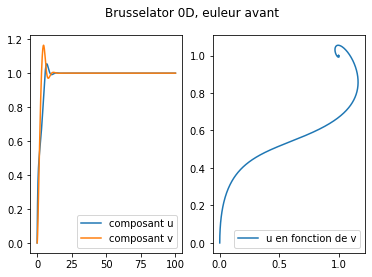

In [4]:
a,b,t = eul_av(1,1,0,0,100,0.01)

fig1 = plt.figure()
fig1.suptitle('Brusselator 0D, euleur avant')
ax1 = fig1.add_subplot(121)
ax1.plot(t,a,label = 'composant u')
ax1.plot(t,b,label = 'composant v')
plt.legend()

ax2 = fig1.add_subplot(122)
ax2.plot(b,a, label = 'u en fonction de v')
plt.legend()